In [1]:
# 1. Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# 2. Cargar datos
df = pd.read_csv("../data_sintetica/clientes_tienda_virtual.csv")
df = df[df['total_compra'] > 0].copy()

In [2]:
# 3. Features y target
X = df[['grupo_edad', 'region', 'nivel_ingresos', 'horas_conectado', 'clics_en_productos', 'uso_cupones']]
y = df['total_compra']

cat_cols = ['grupo_edad', 'region', 'nivel_ingresos']
num_cols = ['horas_conectado', 'clics_en_productos', 'uso_cupones']

In [3]:
# 4. Pipeline polinómico
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_cols),
    ('poly', PolynomialFeatures(degree=2, include_bias=False), num_cols)
])

pipeline = Pipeline([
    ('transform', preprocessor),
    ('regression', LinearRegression())
])

In [4]:
# 5. Split y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

,steps,"[('transform', ...), ('regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('poly', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [5]:
# 6. Evaluación
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 373.35
R²: 0.23


In [6]:
#  7. Validación cruzada
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
y_cv_pred = cross_val_predict(pipeline, X, y, cv=5)
cv_rmse = np.sqrt(mean_squared_error(y, y_cv_pred))

print("R² por fold:", np.round(scores, 3))
print("R² promedio (CV):", scores.mean())
print(f"RMSE promedio (CV): {cv_rmse:.2f}")

R² por fold: [0.26  0.242 0.218 0.218 0.251]
R² promedio (CV): 0.23770469966901714
RMSE promedio (CV): 376.14


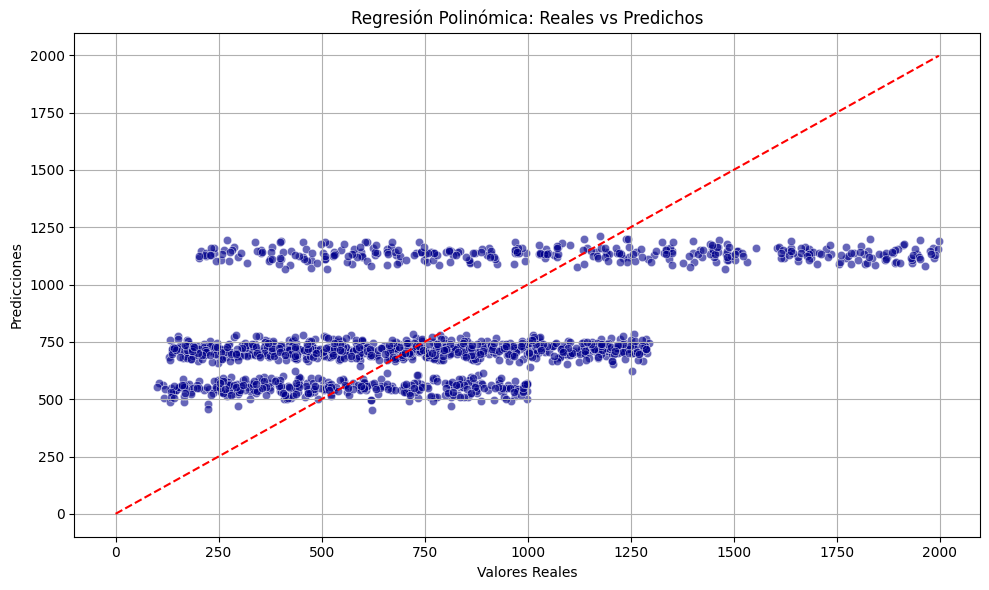

In [7]:
# 8. Guardar predicciones
resultados = pd.DataFrame({'real': y_test, 'predicho': y_pred})
resultados.to_csv(os.path.join("..", "resultados_modelos", "regresion", "prediccion_regresion_polinomica.csv"), index=False)

# 9. Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='darkblue')
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle='--', color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Polinómica: Reales vs Predichos")
plt.grid()
plt.tight_layout()
plt.show()